In [144]:
import numpy as np
import argparse
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image

import os

In [145]:
image_size = (1920, 1080) # width, height
calibration_file = "calibration.npz"
test_image_file = ""

In [146]:
print("using calibration file at: " + calibration_file)

calibrationParams = np.load(calibration_file)
mtx = calibrationParams['mtx']
dist = calibrationParams['dist']

print("mtx=")
print(mtx)
print("dist=")
print(dist)

using calibration file at: calibration.npz
mtx=
[[1.43864737e+03 0.00000000e+00 1.01778586e+03]
 [0.00000000e+00 1.43225687e+03 5.79732557e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
dist=
[[-0.44544757  0.26793777 -0.01078108 -0.01066561 -0.10889512]]


In [147]:
alphaX = mtx[0][0]
alphaY = mtx[1][1]

# from https://github.com/opencv/opencv/blob/2.4/modules/calib3d/src/calibration.cpp#L1778

imageWidth = image_size[0]
fovX = 2*np.atan(imageWidth/(2*alphaX))
fovX_deg = fovX * 180/np.pi
print("fovX in degrees: " + str(fovX_deg))

imageHeight = image_size[1]
fovY = 2*np.atan(imageHeight/(2*alphaY))
fovY_deg = fovY * 180/np.pi
print("fovY in degrees: " + str(fovY_deg))

fovX in degrees: 67.42984691451045
fovY in degrees: 41.31562911527842


In [311]:
path = "C:/Users/littl/OneDrive - University of Toronto/Winter 2025/CSC2530/Project/datasets/distance_tests/close-medium-far"
# path = "C:/Users/littl/OneDrive - University of Toronto/Winter 2025/CSC2530/Project/datasets/distance_tests/very-far"

imgNumber = 39
imgFileName = "webcam_" + str(imgNumber) + ".png"


imageFile0 = os.path.join(path, imgFileName)
print(imageFile0)

C:/Users/littl/OneDrive - University of Toronto/Winter 2025/CSC2530/Project/datasets/distance_tests/close-medium-far\webcam_39.png


In [312]:
img0 = cv.imread(imageFile0)
# cv.imshow("image0", img0)
# type(img0)

numpy.ndarray

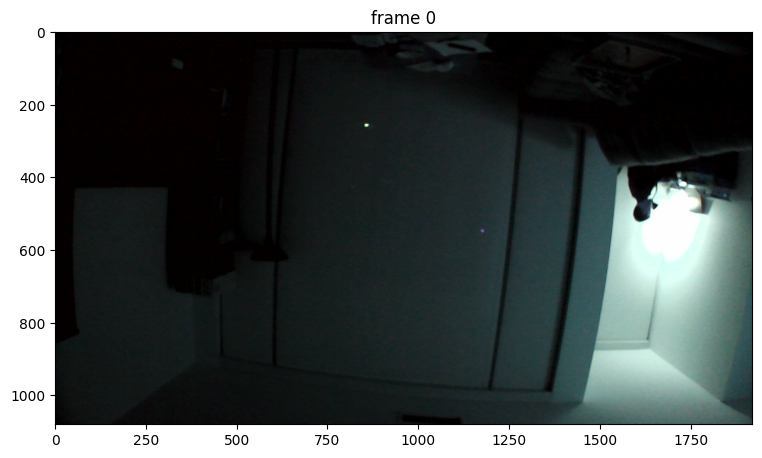

In [313]:
import matplotlib.pyplot as plt
from PIL import Image
plot_rescale = 4
plt.figure(figsize=(9, 6))
plt.title(f"frame 0")
# img = Image.open(imageFile0)
# type(img)

# img0 = cv.rotate(img0, cv.ROTATE_180)
plt.imshow(img0)

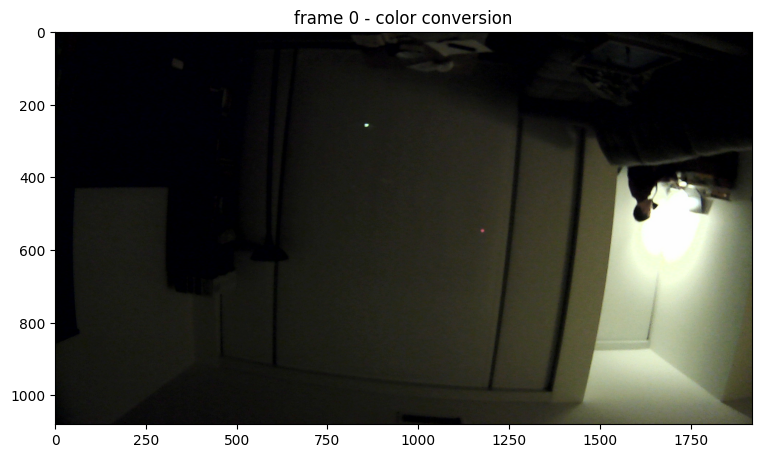

In [314]:
img0 = cv.cvtColor(img0, cv.COLOR_RGB2BGR )
plt.figure(figsize=(9, 6))
plt.title(f"frame 0 - color conversion")
plt.imshow(img0)

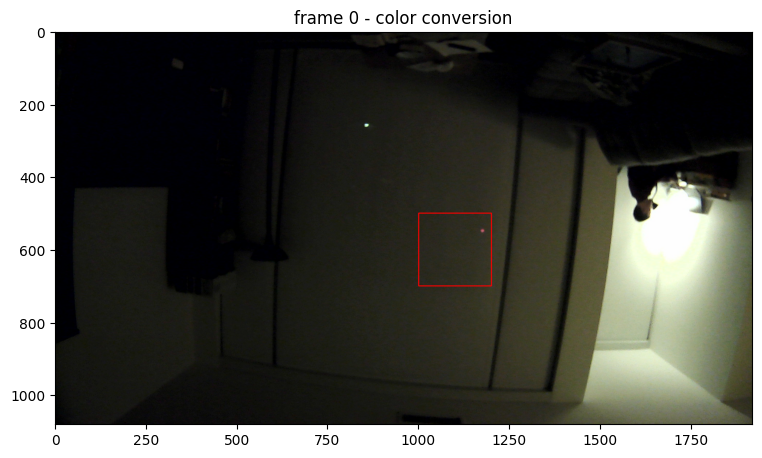

In [315]:
# search region (xMax, yMax); (xMin, yMin)

# very-far image0
# searchMin = (1100, 500)
# searchMax = (1250, 700)

# image 24
# searchMin = (800, 500)
# searchMax = (1100, 700)

# image 2, 33, 39
searchMin = (1000, 500)
searchMax = (1200, 700)

# Blue color in BGR
color = (255, 0, 0)
# Line thickness of 2 px
thickness = 2
# Using cv.rectangle() method
# Draw a rectangle with blue line borders of thickness of 2 px
img0_annotated = img0.copy()
cv.rectangle(img0_annotated, searchMin, searchMax, color, thickness)
plt.figure(figsize=(9, 6))
plt.title(f"frame 0 - color conversion")
plt.imshow(img0_annotated)

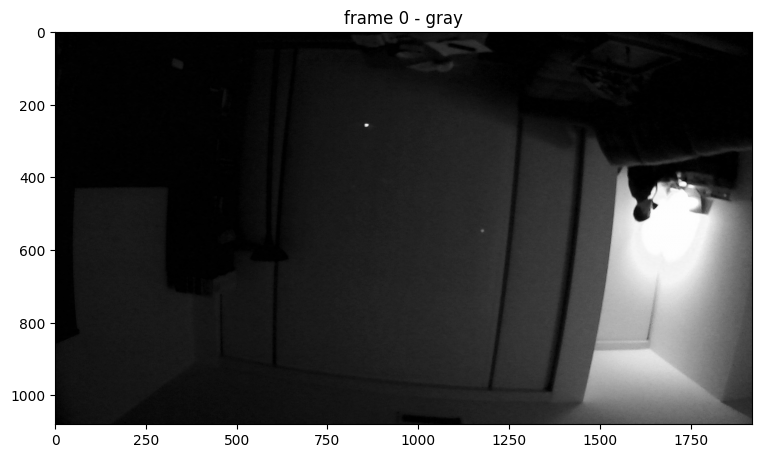

In [316]:
gray = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)
gray.shape
plt.figure(figsize=(9, 6))
plt.title(f"frame 0 - gray")
plt.imshow(gray, cmap='gray')

In [317]:
mask = np.zeros(gray.shape)

xMax = searchMax[0]
xMin = searchMin[0]
yMax = searchMax[1]
yMin = searchMin[1]

mask[yMin:yMax, xMin:xMax] = gray[yMin:yMax, xMin:xMax]

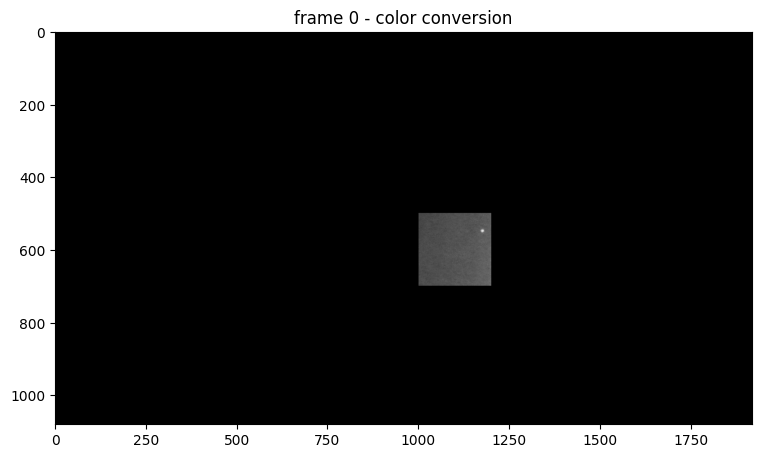

In [318]:
plt.figure(figsize=(9, 6))
plt.title(f"frame 0 - color conversion")
plt.imshow(mask, cmap='gray')

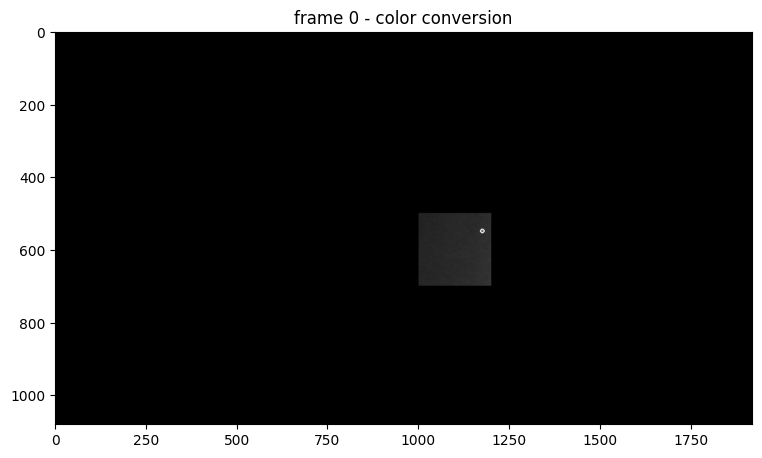

In [319]:
(minVal, maxVal, minLoc, maxLoc) = cv.minMaxLoc(mask)
mask_circled = cv.circle(mask, maxLoc, 5, (255, 0, 0), 2)

plt.figure(figsize=(9, 6))
plt.title(f"frame 0 - color conversion")
plt.imshow(mask_circled, cmap='gray')

In [320]:
maxLoc

(1175, 549)

In [275]:
laserDot = maxLoc

laserDotX = maxLoc[0]
laserDotY = maxLoc[1]

print(laserDotX, laserDotY)

laserDotR = np.sqrt(laserDotX**2 + laserDotY**2)
print(laserDotR)

1189 538
1305.0536387444004


In [252]:


w = imageWidth
h = imageHeight

# beta = 
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

In [253]:
newcameramtx, roi

(array([[8.66684224e+02, 0.00000000e+00, 1.02183430e+03],
        [0.00000000e+00, 8.71185415e+02, 5.37725759e+02],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 (244, 163, 1488, 701))

In [254]:
mtx

array([[1.43864737e+03, 0.00000000e+00, 1.01778586e+03],
       [0.00000000e+00, 1.43225687e+03, 5.79732557e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

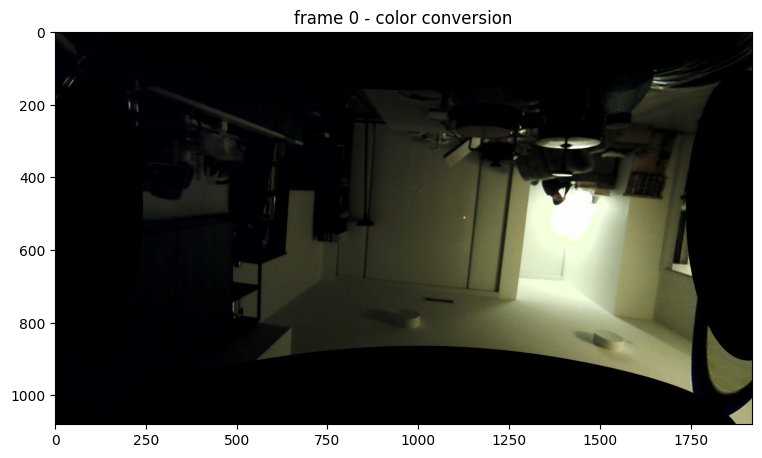

In [255]:
img0_rectified = cv.undistort(img0, mtx, dist, None, newcameramtx)
plt.figure(figsize=(9, 6))
plt.title(f"frame 0 - color conversion")
plt.imshow(img0_rectified)

In [256]:
print(img0_rectified.shape)
alphaX = newcameramtx[0][0]
alphaY = newcameramtx[1][1]

# from https://github.com/opencv/opencv/blob/2.4/modules/calib3d/src/calibration.cpp#L1778

imageWidth = image_size[0]
fovX = 2*np.atan(imageWidth/(2*alphaX))
fovX_deg = fovX * 180/np.pi
print("fovX in degrees: " + str(fovX_deg))

imageHeight = image_size[1]
fovY = 2*np.atan(imageHeight/(2*alphaY))
fovY_deg = fovY * 180/np.pi
print("fovY in degrees: " + str(fovY_deg))

(1080, 1920, 3)
fovX in degrees: 95.84880119677021
fovY in degrees: 63.585002128768295


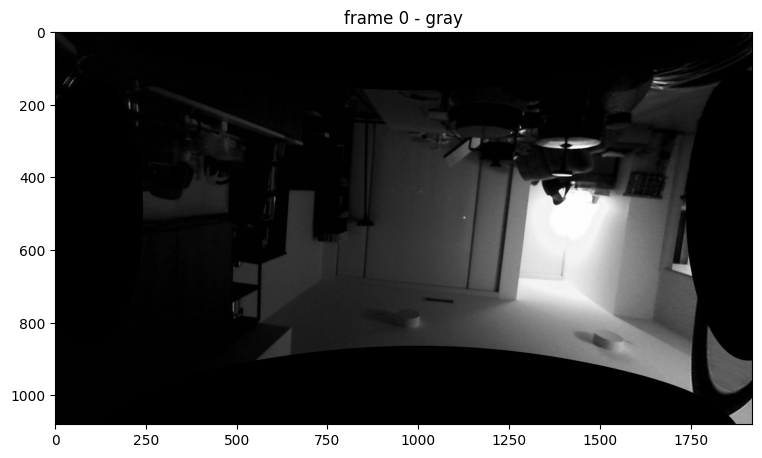

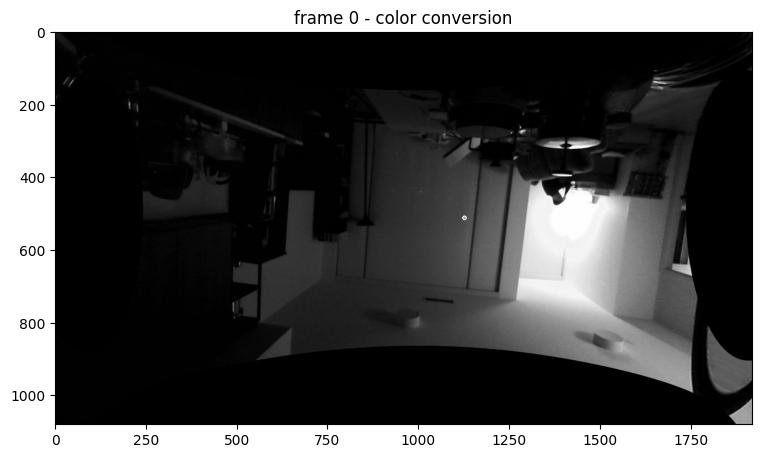

In [257]:
gray_rectified = cv.cvtColor(img0_rectified, cv.COLOR_BGR2GRAY)
gray_rectified.shape
plt.figure(figsize=(9, 6))
plt.title(f"frame 0 - gray")
plt.imshow(gray_rectified, cmap='gray')

mask_rectified = np.zeros(gray.shape)

searchMax = (1250, 600)
searchMin = (100, 400)
xMax = searchMax[0]
xMin = searchMin[0]
yMax = searchMax[1]
yMin = searchMin[1]
mask_rectified[yMin:yMax, xMin:xMax] = gray_rectified[yMin:yMax, xMin:xMax]

(minVal, maxVal, minLoc, maxLoc) = cv.minMaxLoc(mask_rectified)
mask_circled = cv.circle(gray_rectified, maxLoc, 5, (255, 0, 0), 2)

plt.figure(figsize=(9, 6))
plt.title(f"frame 0 - color conversion")
plt.imshow(mask_circled, cmap='gray')

In [258]:
maxLoc

(1126, 513)

In [259]:
import sympy
import scipy

(1126, 512)


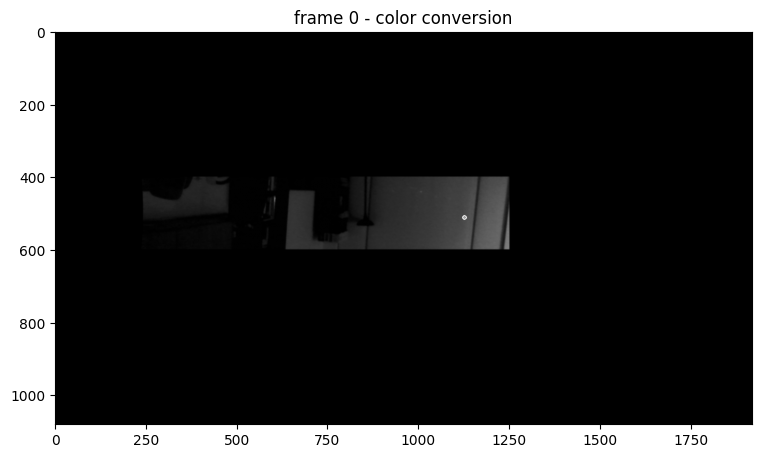

In [260]:
radius = 5
grayBlurred = cv.GaussianBlur(mask_rectified, (radius, radius), 0)
(minVal, maxVal, minLoc, maxLoc) = cv.minMaxLoc(grayBlurred)

cv.circle(grayBlurred, maxLoc, radius, (255, 0, 0), 2)
plt.figure(figsize=(9, 6))
plt.title(f"frame 0 - color conversion")
plt.imshow(grayBlurred, cmap='gray')
print(maxLoc)

In [262]:
new_imgFileName = "rectified" + str(imgNumber) + ".png"
cv.imwrite(new_imgFileName, img0_rectified)

True